1. Impoting Dependencies :

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

2. Data Collcetion and Analysis:

A- Loading dataset :

In [2]:
data_mart = data_car = pd.read_csv("C:/Machine_learning Python/projets/bigMart/Train.csv")

B- View the data (head)

In [3]:
data_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


C- type of  the data

In [4]:
type(data_mart)

pandas.core.frame.DataFrame

D-Number of row & columns:

In [5]:
data_mart.shape

(8523, 12)

E- Information about the data:

In [6]:
data_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


2. Statisctical measures :

A- General Statistic:

In [7]:
data_mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


B- Missing values:

In [8]:
data_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

C- Handling missing values:

In [9]:
#Mean value of Item_Xeight column
m = data_mart["Item_Weight"].mean()
#Filling the missing value of Item_Xeight with m
data_mart["Item_Weight"].fillna(m,inplace=True)
data_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#Filling the missing value of Item_Xeight with mode
modee = data_mart.pivot_table(values='Outlet_Size' ,columns= 'Outlet_Type' , aggfunc=(lambda x: x.mode()[0]))
print(modee)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [11]:
missing_value  = data_mart['Outlet_Size'].isnull()
print(missing_value)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [12]:
data_mart.loc[missing_value , 'Outlet_Size'] = data_mart.loc[missing_value , 'Outlet_Type'].apply(lambda x: modee) 

In [13]:
data_mart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

3. Data Analysis:

A- Numerical Features:

A-1. Distribution of Item_Weight :

<Figure size 600x600 with 0 Axes>

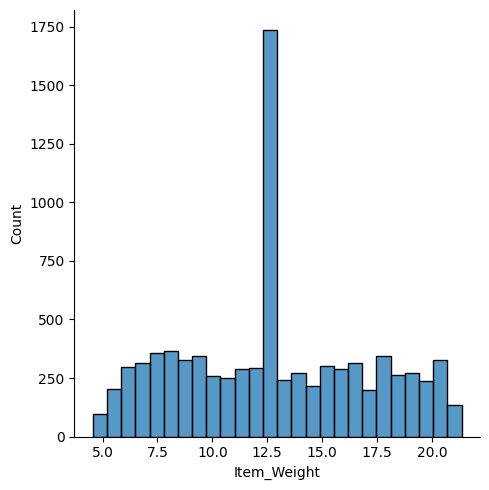

In [14]:
plt.figure(figsize=(6,6))
sns.displot(data_mart["Item_Weight"])
plt.show()
#Normal distribution

A-2. Distribution of Item_Visibility :

<Figure size 600x600 with 0 Axes>

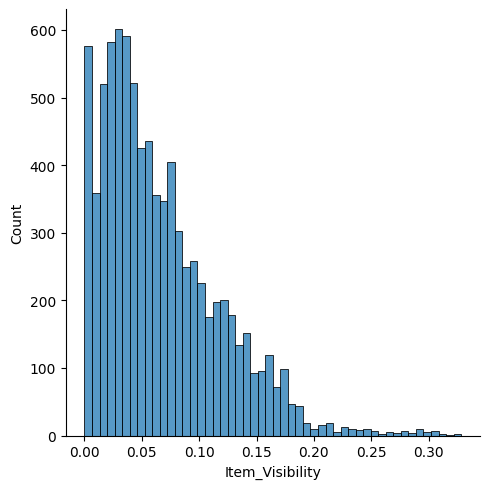

In [15]:
plt.figure(figsize=(6,6))
sns.displot(data_mart["Item_Visibility"])
plt.show()
#Not Normal distribution

A-3. Distribution of Item_MRP :

<Figure size 600x600 with 0 Axes>

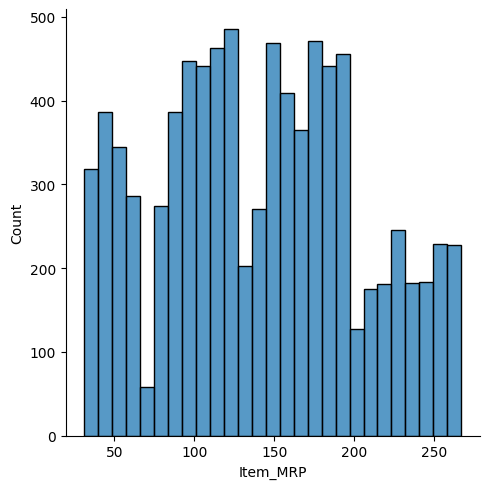

In [16]:
plt.figure(figsize=(6,6))
sns.displot(data_mart["Item_MRP"])
plt.show()
#Not Normal distribution

A-4. Distribution of Item_Outlet_Sales :

<Figure size 600x600 with 0 Axes>

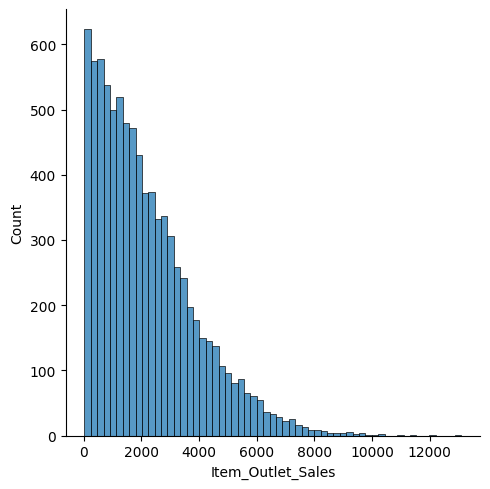

In [17]:
plt.figure(figsize=(6,6))
sns.displot(data_mart["Item_Outlet_Sales"])
plt.show()
#Not Normal distribution

A-5. Distribution of Outlet_Establishment_Year 

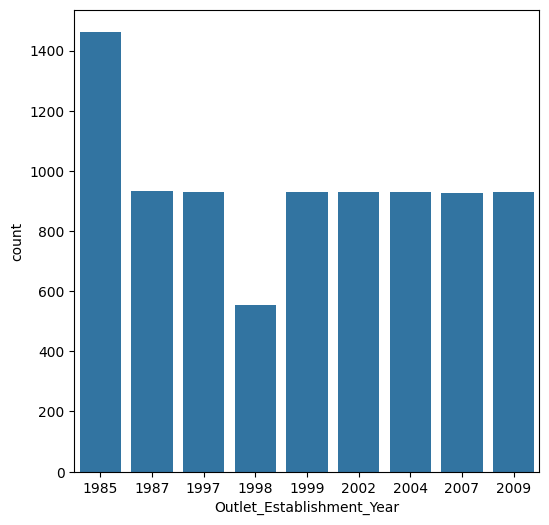

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x = "Outlet_Establishment_Year", data= data_mart )
plt.show()

B- Categorical Features:

B-1. Count of the Item_Fat_Content

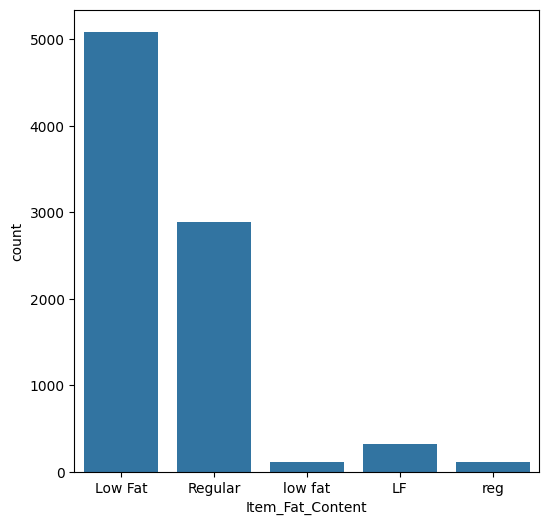

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x = "Item_Fat_Content", data= data_mart )
plt.show()

B-2. Count of the Item_Type

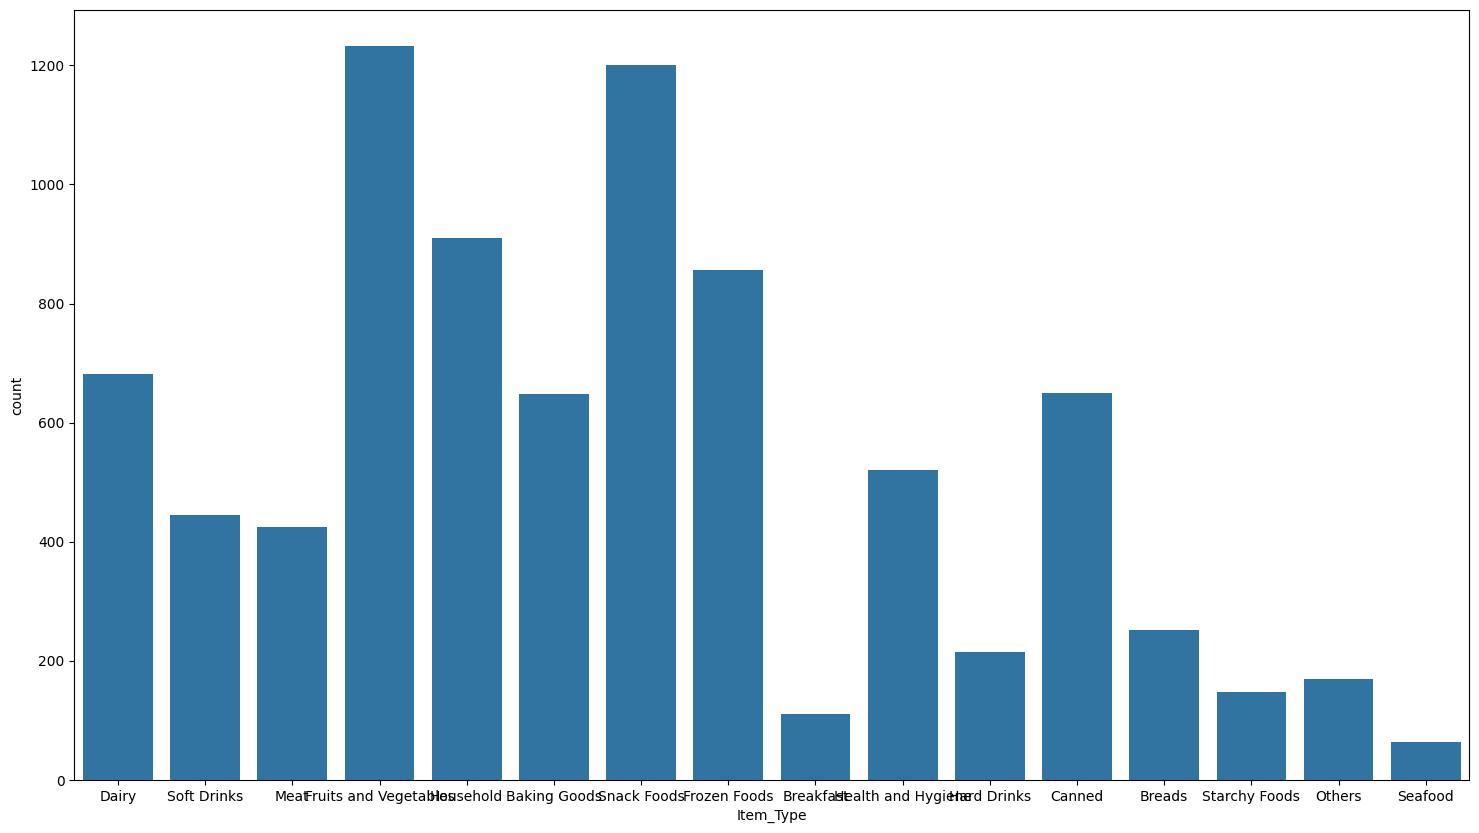

In [20]:
plt.figure(figsize=(18,10))
sns.countplot(x = "Item_Type", data= data_mart )
plt.show()

4. Label Encoding:

A- Replace the LF and reg to ow Fat and regular:

In [21]:
data_mart["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [22]:
data_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
data_mart.replace( {'Item_Fat_Content' : {'low fat' : 'Low Fat' , 'LF' : 'Low Fat' ,'reg' : 'Regular' }}, inplace = True) 
data_mart["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

B- Transform the categorical value into yhe numerical value:

In [24]:
encoder = LabelEncoder()

In [29]:
data_mart = data_mart.drop('Outlet_Size', axis=1)

In [30]:
data_mart['Item_Identifier'] = encoder.fit_transform(data_mart['Item_Identifier'])
data_mart['Item_Fat_Content'] = encoder.fit_transform(data_mart['Item_Fat_Content'])
data_mart['Item_Type'] = encoder.fit_transform(data_mart['Item_Type'])
data_mart['Outlet_Identifier'] = encoder.fit_transform(data_mart['Outlet_Identifier'])
data_mart['Outlet_Location_Type'] = encoder.fit_transform(data_mart['Outlet_Location_Type'])
data_mart['Outlet_Type'] = encoder.fit_transform(data_mart['Outlet_Type'])

In [31]:
data_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,2,1,994.7052


5. Spliting feature & target:

A- Separating a data & label

In [32]:
X = data_mart.drop(columns='Item_Outlet_Sales', axis=1)
Y = data_mart['Item_Outlet_Sales']
print(X)
print(Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

B- Test Split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [34]:
print(X.shape,X_train.shape, X_test.shape)

(8523, 10) (6818, 10) (1705, 10)


6. Training the model (SGBRegressor):

A- Loading the model

In [35]:
model = XGBRegressor()

B- Training the model:

In [36]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

7. Model Evaluation:

A- Prediction of training data:

In [39]:
training_data = model.predict(X_train)
Rscore = metrics.r2_score(Y_train, training_data)
print("R squared Error of training data : ", Rscore)

R squared Error of training data :  0.874185623422072


B- Prediction of testing data:

In [40]:
training_datatest = model.predict(X_test)
Rscore = metrics.r2_score(Y_test, training_datatest)
print("R squared Error of testing data: ", Rscore)

R squared Error of testing data:  0.4934005358588578


8- Example:

In [49]:
def  predictionF(Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type):
    input_data = (Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type)
    #Input the data into the numpy array:
    input_dataNumpuy = np.asarray(input_data)
    #Reshape the data:
    input_dataReshaped = input_dataNumpuy.reshape(1,-1)
    #Predict the model:
    prediction = model.predict(input_dataReshaped)
    print("The predcition Item_Outlet_Sales is:", prediction[0])

predictionF(156,9.30,0,0.016047,4,249.8092,9,1999,0,1)

The predcition Item_Outlet_Sales is: 4284.2456
